In [1]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [3]:
df.drop(168,axis=0,inplace=True)

In [4]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [5]:
df.columns=["ds","y"]

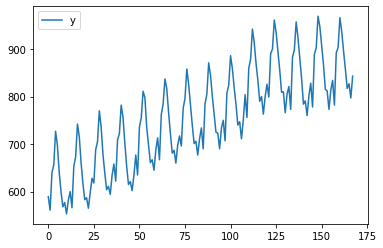

In [6]:
df.plot()

In [7]:
df['ds']=pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


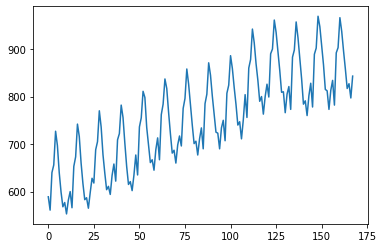

In [9]:
df['y'].plot()

In [10]:
from fbprophet import Prophet

In [11]:

dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [12]:

### intiialize the Model
model=Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
model

In [14]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [15]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [16]:

#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [17]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [18]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [ ]:
### Prediction
prediction=model.predict(future_dates)

In [ ]:
prediction

In [ ]:
prediction.head()

In [ ]:

prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [ ]:

prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.774860,577.095454,596.789066
1,1962-02-01,546.014381,536.239605,556.050393
2,1962-03-01,641.565665,631.524777,650.919641
3,1962-04-01,658.582860,648.412928,668.205093
4,1962-05-01,721.564225,711.425640,731.722579


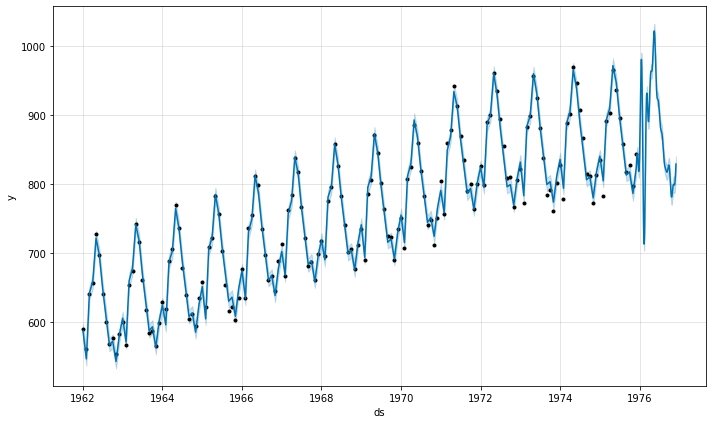

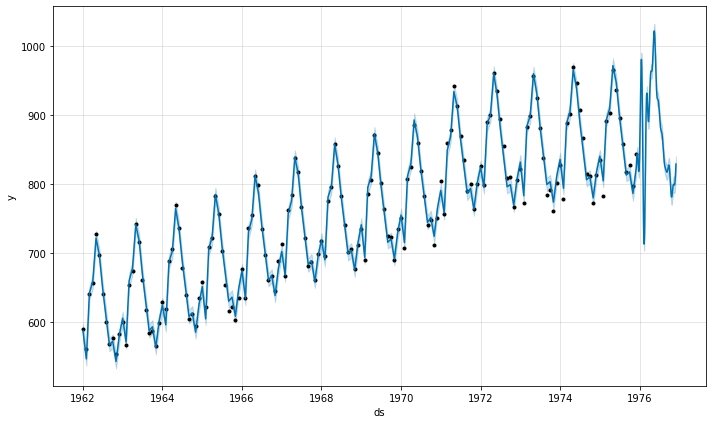

In [ ]:

#### plot the predicted projection
model.plot(prediction)

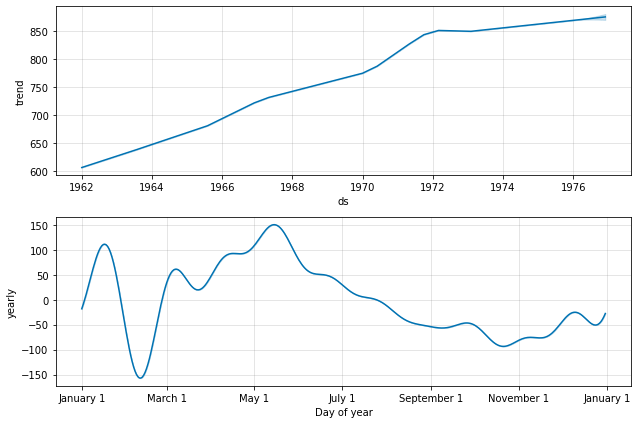

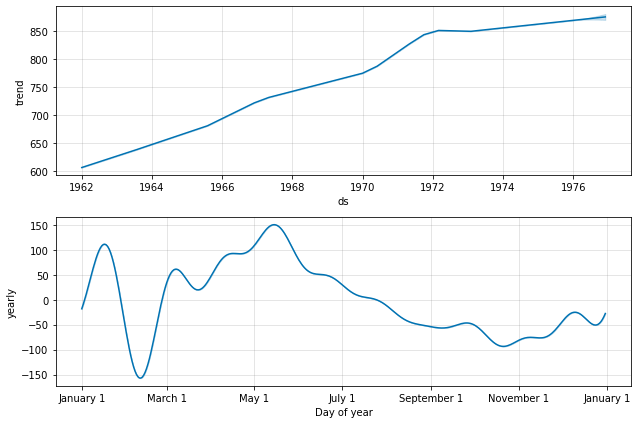

In [ ]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,631.098104,629.537525,633.099280,622.0,1965-01-22
1,1965-03-01,715.100495,709.578625,721.559716,709.0,1965-01-22
2,1965-04-01,735.552474,724.085960,748.572131,722.0,1965-01-22
3,1965-05-01,806.443792,788.005597,826.930043,782.0,1965-01-22
4,1965-06-01,774.722057,748.332130,802.957012,756.0,1965-01-22
...,...,...,...,...,...,...
247,1975-08-01,850.716644,841.068129,861.477044,858.0,1974-12-01
248,1975-09-01,808.304147,799.158515,817.888002,817.0,1974-12-01
249,1975-10-01,811.731165,802.000050,822.012947,827.0,1974-12-01
250,1975-11-01,779.755821,769.665453,791.351067,797.0,1974-12-01


In [ ]:

from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,256.280704,16.008770,12.605681,0.016238,0.014528,0.32
1,41 days,254.154295,15.942217,12.519149,0.016164,0.014528,0.32
2,42 days,269.044308,16.402570,12.982869,0.016809,0.014573,0.32
3,43 days,269.417584,16.413945,13.091628,0.016979,0.014573,0.32
4,46 days,254.738535,15.960531,12.733113,0.016470,0.014528,0.32


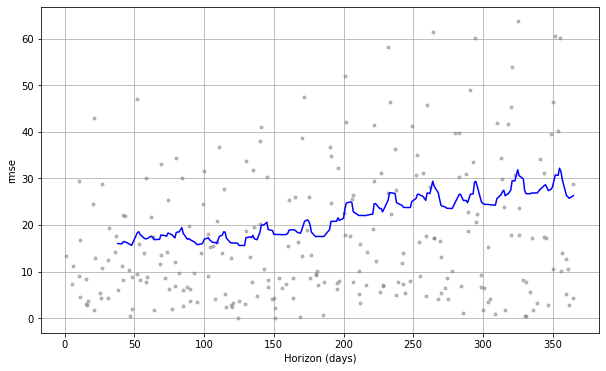

In [ ]:

from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')